In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import unicodedata
import string

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

import spacy
nlp = spacy.load('en_core_web_sm')

import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv('Tweets.csv')

In [28]:
print(len(df))
df.head()

14640


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

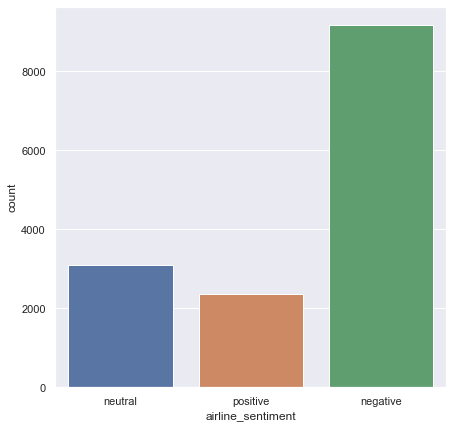

In [29]:
#classifying the sentiments 
print(df['airline_sentiment'].value_counts())
sns.countplot(df['airline_sentiment'])

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


<AxesSubplot:xlabel='airline', ylabel='count'>

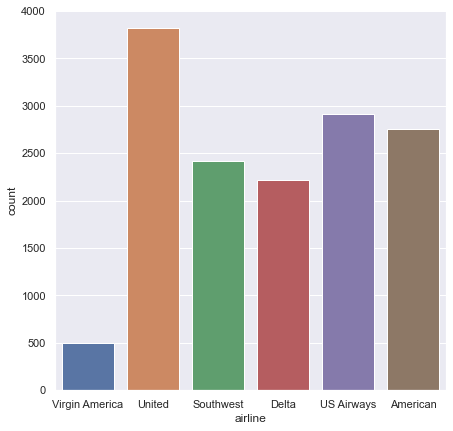

In [30]:
#No of tweets in each airline
print(df.airline.value_counts())
sns.countplot(df['airline'])

negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64 US Airways
negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64 United
negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64 American
negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64 Southwest
negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64 Delta
negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64 Virgin America


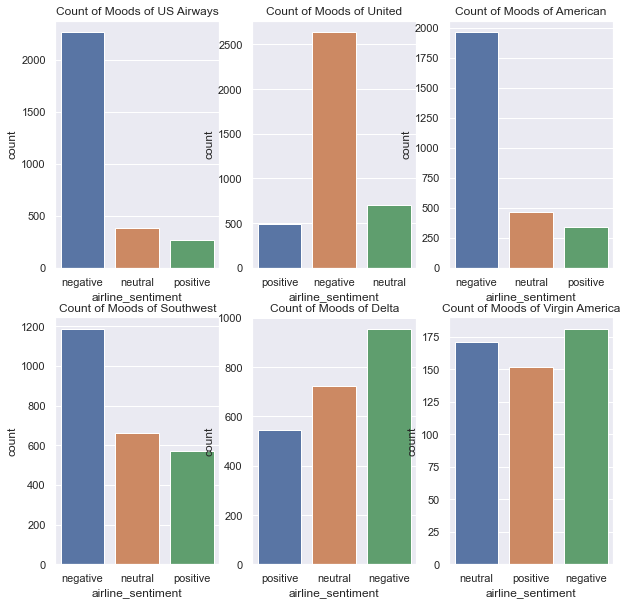

In [31]:
#calculate no of sentiment for each airline 
plt.figure(1,figsize=(10,10))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines:
    indices=airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_value=df[df['airline']==i]
    print(new_value['airline_sentiment'].value_counts(),i)
    Index = [1,2,3]
    sns.countplot(new_value['airline_sentiment'])
    plt.title('Count of Moods of '+i)

In [32]:
#Create dictionary of all tweets
tweet_dictionary = {}
i = 0
for line in dataset:
        tweet_dictionary[i] = line.lower()
        i += 1

In [33]:
#removing all the links
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=strip_links(tweet_dictionary[i])

In [34]:
#removing all the mention hashtags
def strip_mentions_hashtags(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=strip_mentions_hashtags(tweet_dictionary[i])

In [35]:
#removing special characters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=remove_special_characters(tweet_dictionary[i],remove_digits=True)

In [36]:
#removing stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=remove_stopwords(tweet_dictionary[i])

In [37]:
#stemming the text
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [38]:
#lemmatizing the text
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=lemmatize_text(tweet_dictionary[i])

In [39]:
# Remove words which are shorter than 3 characters. 
# This is for removing words with less meaning
df['text'] = tweet_dictionary.values()
df['text'] = df['text'].apply(lambda x : re.sub(r'\b\w{1,3}\b', '', x))

In [40]:
# Remove words existing in less than min_df documents and remove words existing in more than max_df percentage of documents
vectorizer = TfidfVectorizer(min_df=15, max_df=0.6, ngram_range=(1,3))
temp_df = vectorizer.fit_transform(df['text'])
text_df = pd.DataFrame(temp_df.toarray(), columns=vectorizer.get_feature_names())

In [41]:
df = df[['airline_sentiment','retweet_count', 'airline']]

In [42]:
#dummy values
airline_one_hot = pd.get_dummies(df['airline'])
df = df.drop('airline',axis=1)
df = df.join(airline_one_hot)
final_df = pd.concat([df, text_df], axis=1)

In [43]:
# Separate features and target
df_features = final_df.iloc[:, 1:].values
df_target = final_df.iloc[:,0].values

In [44]:
#Splitting training and test data
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size=0.2, random_state=0)

In [45]:
# Using Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
dtacc = acc
print('\tPrediction: ', y_pred)
print('\tCorrect:    ', y_test)
print('\tAccuracy: ', acc)
print(classification_report(y_test, y_pred))

	Prediction:  ['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
	Correct:     ['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
	Accuracy:  0.6898907103825137
              precision    recall  f1-score   support

    negative       0.81      0.79      0.80      1870
     neutral       0.45      0.48      0.47       614
    positive       0.55      0.54      0.54       444

    accuracy                           0.69      2928
   macro avg       0.60      0.61      0.60      2928
weighted avg       0.69      0.69      0.69      2928



In [46]:
# Using Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
rfacc = acc
print('\tPrediction: ', y_pred)
print('\tCorrect:    ', y_test)
print('\tAccuracy:', acc)
print(classification_report(y_test, y_pred))

	Prediction:  ['negative' 'neutral' 'negative' ... 'negative' 'negative' 'negative']
	Correct:     ['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
	Accuracy: 0.7469262295081968
              precision    recall  f1-score   support

    negative       0.80      0.89      0.84      1870
     neutral       0.56      0.45      0.50       614
    positive       0.69      0.57      0.62       444

    accuracy                           0.75      2928
   macro avg       0.68      0.64      0.65      2928
weighted avg       0.73      0.75      0.74      2928



In [47]:
# Using Support Vector Machines
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
svmacc = acc
print('\tPrediction: ', y_pred)
print('\tCorrect:    ', y_test)
print('\tAccuracy: ', acc)
print(classification_report(y_test, y_pred))

	Prediction:  ['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
	Correct:     ['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
	Accuracy:  0.7599043715846995
              precision    recall  f1-score   support

    negative       0.78      0.94      0.85      1870
     neutral       0.63      0.36      0.46       614
    positive       0.78      0.56      0.65       444

    accuracy                           0.76      2928
   macro avg       0.73      0.62      0.65      2928
weighted avg       0.75      0.76      0.74      2928



The accuracy score achieved using Decision Tree is: 0.6898907103825137 %
The accuracy score achieved using Random Forest is: 0.7469262295081968 %
The accuracy score achieved using Support Vector Machines is: 0.7599043715846995 %


<AxesSubplot:title={'center':'Comparison'}, xlabel='Algorithms', ylabel='Accuracy score'>

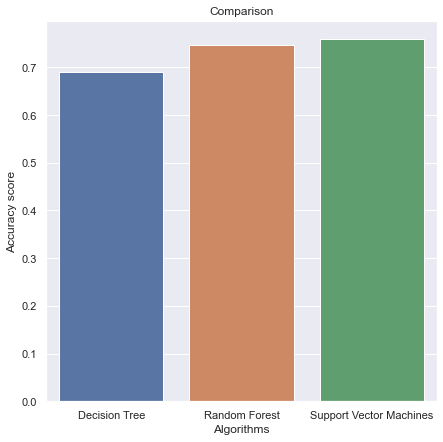

In [48]:
# Comparing all the models
scores = [dtacc,rfacc,svmacc]
algorithms = ["Decision Tree","Random Forest","Support Vector Machines"]
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
sns.set(rc={'figure.figsize':(7,7)})
plt.title("Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)